In [1]:
%matplotlib widget
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

In [2]:
calib = pd.read_csv('Calib strain gauge.csv')
calib

,weight (g),raw reading
0,-48,-351.386729
1,79,624.287558
2,79,723.494792
3,48,320.807449
4,-48,-282.189893
5,200,1581.664482
6,-119,-914.961317
7,119,864.843243
8,119,863.518338
9,-200,-1572.886371


In [3]:
calib['reading'] = 200 * calib['raw reading'] / calib.loc[calib['weight (g)']==200, 'raw reading'].mean()
calib['reading'] = calib['reading'] - calib.loc[calib['weight (g)']==0, 'reading'].mean()
calib['torque (g.cm)'] = calib['reading'] * 7

In [4]:
calib

,weight (g),raw reading,reading,torque (g.cm)
0,-48,-351.386729,-51.161720,-358.132042
1,79,624.287558,78.237843,547.664904
2,79,723.494792,91.395280,639.766962
3,48,320.807449,37.988557,265.919900
4,-48,-282.189893,-41.984436,-293.891051
5,200,1581.664482,205.210705,1436.474936
6,-119,-914.961317,-125.906240,-881.343679
7,119,864.843243,110.141729,770.992103
8,119,863.518338,109.966012,769.762087
9,-200,-1572.886371,-213.164063,-1492.148444


In [5]:
slope, intercept, r, p, se = scipy.stats.linregress(calib['weight (g)'], calib['torque (g.cm)'])
print(slope, intercept, r, p, se)

7.0026170148631435 -16.956354781985812 0.9979754851565796 4.18549131692437e-65 0.0612996686485744


In [6]:
angle=36

/tmp/ipykernel_17478/3737882727.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(l)
/tmp/ipykernel_17478/3737882727.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(l)


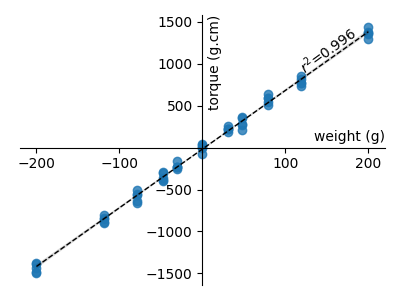

In [7]:
fig, ax = plt.subplots(figsize=(4,3))
#sns.scatterplot(data=calib, x='weight (g)', y='raw reading')
sns.regplot(data=calib, x='weight (g)', y='torque (g.cm)', line_kws=dict(lw=1, color='k', ls='--'))
sns.despine()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.set_xlabel('weight (g)', loc='right', labelpad=-20, va='bottom')
ax.set_ylabel('torque (g.cm)', loc='top', labelpad=-55)


i, = np.where(ax.get_xticks()==0)
l = ax.get_xticklabels()
l[i[0]] = ''
ax.set_xticklabels(l)

i, = np.where(ax.get_yticks()==0)
l = ax.get_yticklabels()
l[i[0]] = ''
ax.set_yticklabels(l)

pos = 190
y_pos = pos * slope + intercept
ax.annotate(f'$r^2$={r**2:.3f}', xy=(pos, y_pos), xytext=(0,10), textcoords='offset points', ha='right', va='top', rotation=angle, transform_rotates_text=True)

fig.tight_layout()
fig.savefig('calibration.svg')
fig.savefig('calibration.png')
